In [117]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [118]:
ticker = 'TCS.NS'
start_date = '2022-01-01'
end_date = '2024-12-31'

In [119]:
tcs_data = yf.download(ticker, start=start_date, end=end_date)
print(tcs_data)

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2022-01-03  3648.753418  3660.461159  3579.223771  3584.002441  2346158
2022-01-04  3712.788086  3716.993223  3642.971662  3661.513044  2488606
2022-01-05  3690.040771  3698.690210  3643.639844  3693.911540  1733031
2022-01-06  3638.909912  3665.240434  3605.029183  3643.258549  1810293
2022-01-07  3682.920898  3693.816172  3628.348395  3650.903810  2460591
...                 ...          ...          ...          ...      ...
2024-12-23  4158.299805  4217.000000  4114.899902  4200.049805  2195338
2024-12-24  4179.500000  4218.000000  4158.299805  4158.299805  1181886
2024-12-26  4169.100098  4199.950195  4143.149902  4179.500000  1208464
2024-12-27  4164.850098  4180.950195  4147.250000  4163.000000   858100
2024-12-30  4158.799805  4199.299805  4112.000000  4151.000000  

In [120]:
print(tcs_data.head())


Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2022-01-03  3648.753418  3660.461159  3579.223771  3584.002441  2346158
2022-01-04  3712.788086  3716.993223  3642.971662  3661.513044  2488606
2022-01-05  3690.040771  3698.690210  3643.639844  3693.911540  1733031
2022-01-06  3638.909912  3665.240434  3605.029183  3643.258549  1810293
2022-01-07  3682.920898  3693.816172  3628.348395  3650.903810  2460591


In [121]:
print(tcs_data.tail())

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2024-12-23  4158.299805  4217.000000  4114.899902  4200.049805  2195338
2024-12-24  4179.500000  4218.000000  4158.299805  4158.299805  1181886
2024-12-26  4169.100098  4199.950195  4143.149902  4179.500000  1208464
2024-12-27  4164.850098  4180.950195  4147.250000  4163.000000   858100
2024-12-30  4158.799805  4199.299805  4112.000000  4151.000000  1527169


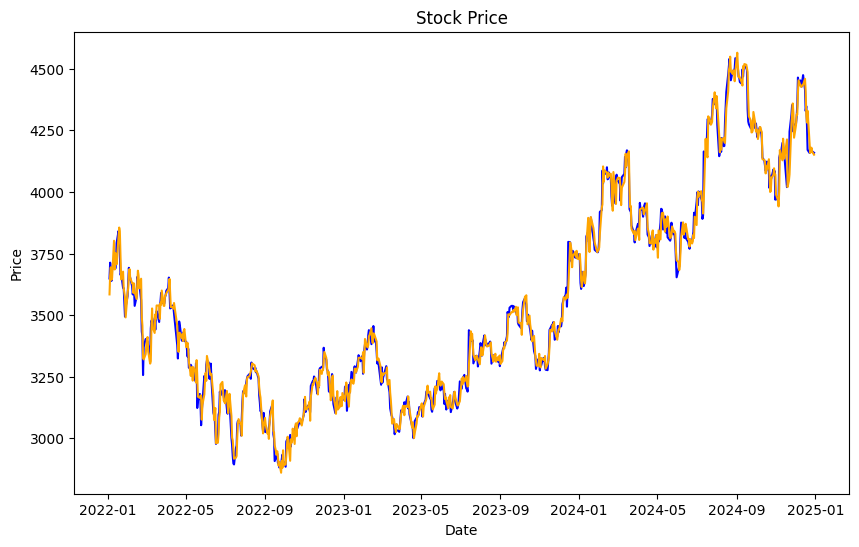

In [122]:
plt.figure(figsize=(10,6))
plt.plot(tcs_data['Close'], label='Close Price', color ='blue')
plt.plot(tcs_data['Open'], label = 'Open Price', color = 'orange')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [123]:
#Check Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(tcs_data['Close'])
print("ADF Statics :",result[0])
print ("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary")
else:
    print("The data is not stationary. Differencing required.")

ADF Statics : -1.1641967043263586
p-value : 0.6888047334270564
The data is not stationary. Differencing required.


In [124]:
#Differencing
tcs_data['Close_differencing']=tcs_data['Close'].diff().dropna()
#Checking data is stationary or not
result= adfuller(tcs_data['Close_differencing'].dropna())
print("ADF Statics :",result[1])
print("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing might be required.")

ADF Statics : 0.0
p-value : 0.0
The data is stationary.


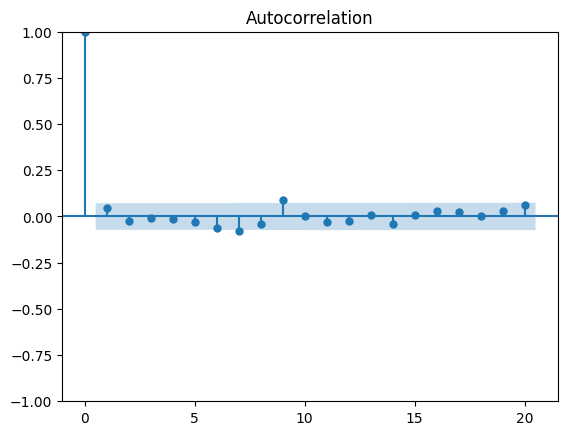

In [125]:
#Autocorrelation and Partial Autocorrelation
plot_acf(tcs_data["Close_differencing"].dropna(),lags=20)
plt.show()


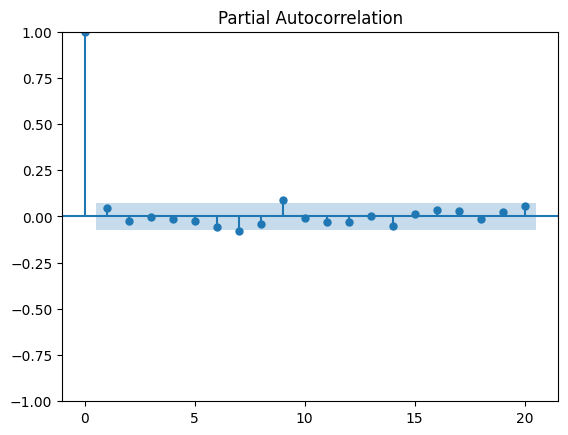

In [126]:
plot_pacf(tcs_data["Close_differencing"].dropna(),lags=20)
plt.show()

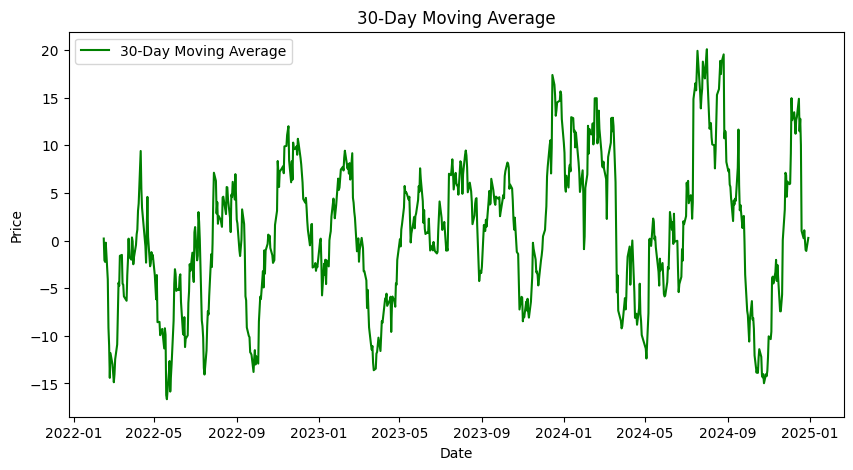

In [127]:
#Calculate 30 day Moving Average
tcs_data['30_day_MA'] = tcs_data['Close_differencing'].rolling(window=30).mean()

#Plotting the Moving Average
plt.figure(figsize=(10,5))
plt.plot(tcs_data['30_day_MA'],label ='30-Day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day Moving Average')
plt.legend()
plt.show()

In [128]:
#Fitting the ARIMA Model
model = ARIMA(tcs_data['Close'], order=(4,1,9))
arima_result = model.fit()
print(arima_result.summary())

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                  738
Model:                 ARIMA(4, 1, 9)   Log Likelihood               -3871.708
Date:                Thu, 02 Jan 2025   AIC                           7771.415
Time:                        21:38:03   BIC                           7835.852
Sample:                             0   HQIC                          7796.264
                                - 738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3598      0.358      1.004      0.315      -0.343       1.062
ar.L2         -0.0056      0.285     -0.020      0.984      -0.563       0.552
ar.L3          0.3334      0.262      1.271      0.2

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
start_date = pd.to_datetime("2024-11-1")
end_date = pd.to_datetime("2024-12-30")


In [130]:
#Check if the dates are within the range of the index
if start_date not in tcs_data.index or end_date not in tcs_data.index:
    print(f"The start_date or end_date is not found in the tcs_data's index. Availabe dates are:")
    print(tcs_data.index.min(), "to", tcs_data.index.max())
else:
    predicted_data = arima_result.predict(start=start_date, end=end_date,typ="level")
    print(tcs_data['Close'].tail(10))
    print("\n Predicted Data")
    print(predicted_data)
    

Ticker           TCS.NS
Date                   
2024-12-16  4415.200195
2024-12-17  4328.500000
2024-12-18  4347.850098
2024-12-19  4271.899902
2024-12-20  4170.299805
2024-12-23  4158.299805
2024-12-24  4179.500000
2024-12-26  4169.100098
2024-12-27  4164.850098
2024-12-30  4158.799805

 Predicted Data
Date
2024-11-01    3959.016302
2024-11-04    3979.448518
2024-11-05    3970.562617
2024-11-06    3973.442627
2024-11-07    4146.037832
2024-11-08    4160.260115
2024-11-11    4156.966573
2024-11-12    4202.861885
2024-11-13    4182.551912
2024-11-14    4144.654769
2024-11-18    4134.735091
2024-11-19    4004.659609
2024-11-21    4056.052710
2024-11-22    4071.960753
2024-11-25    4246.329777
2024-11-26    4323.876005
2024-11-27    4363.530977
2024-11-28    4330.531079
2024-11-29    4238.742179
2024-12-02    4249.911710
2024-12-03    4261.120207
2024-12-04    4293.065150
2024-12-05    4366.577492
2024-12-06    4474.739294
2024-12-09    4444.953880
2024-12-10    4446.284333
2024-12-11    

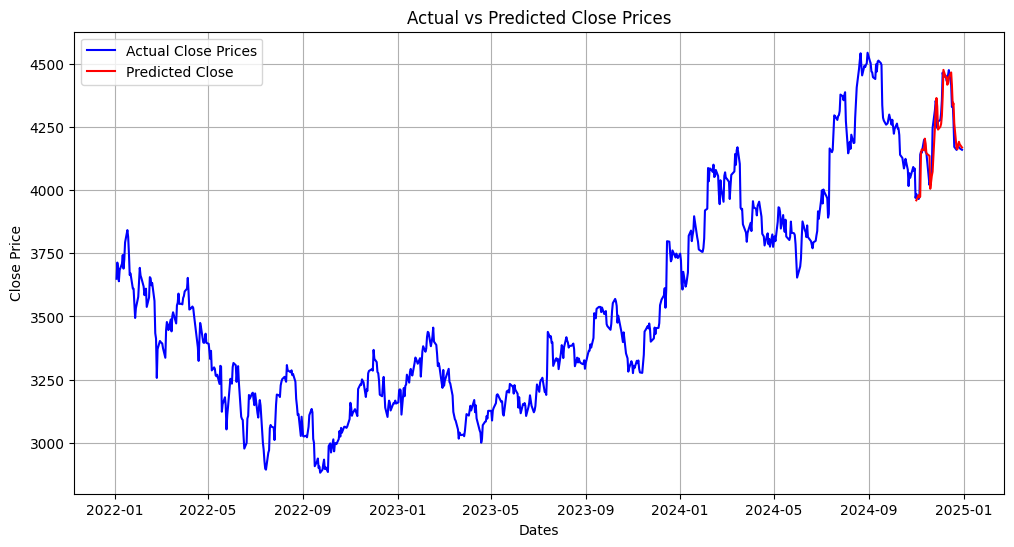

In [131]:
#Plot Actual and Predicted Data
plt.figure(figsize=(12,6))
plt.plot(tcs_data.index,tcs_data['Close'],label ='Actual Close Prices',color='blue')
plt.plot(predicted_data.index,predicted_data, label = 'Predicted Close', color='red')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [132]:
#Forecast next 52 days
forecast_steps =52
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tcs_data.index[-1] +pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


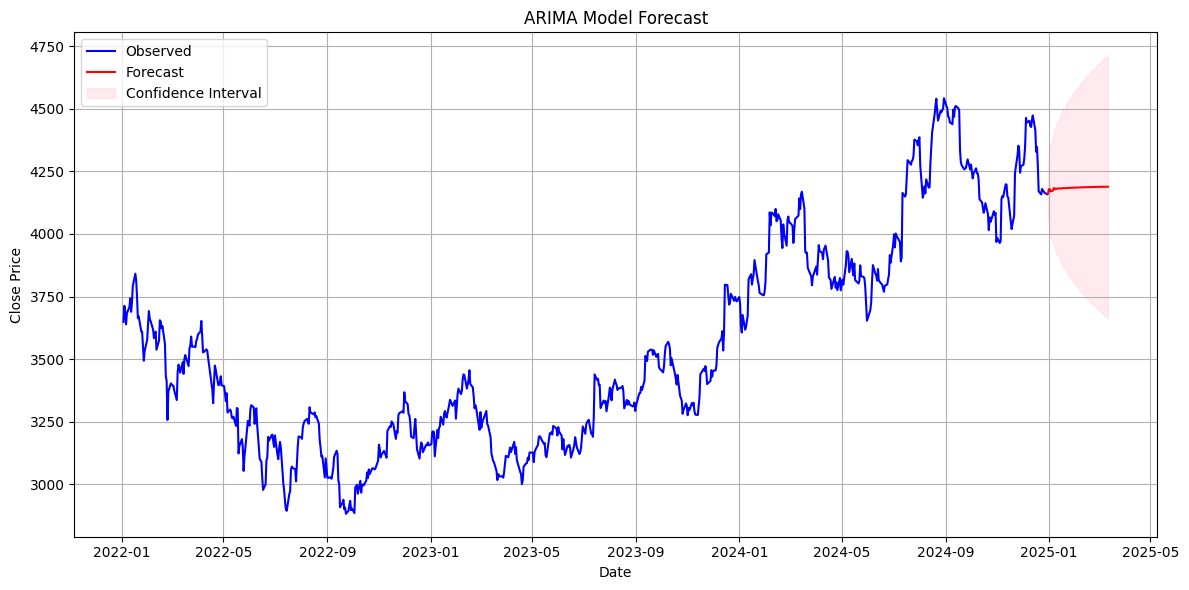

In [133]:

plt.figure(figsize=(12,6))
plt.plot(tcs_data.index, tcs_data['Close'], label ='Observed', color='blue')
plt.plot(forecast_index,forecast_mean, label='Forecast',color='red')
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Ensure that the predictions and actual values are aligned and converted to numpy arrays
actual_values = tcs_data['Close'][-len(predicted_data):].values
predicted_values = predicted_data.values

# Calculate errors
mae = mean_absolute_error(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Normalize errors to percentage
mean_actual = np.mean(actual_values)  
mae_percentage = (mae / mean_actual) * 100
rmse_percentage = (rmse / mean_actual) * 100

# Calculate accuracy
accuracy = 100 - mape

# Print results in percentage
print(f"Mean Absolute Error (MAE): {mae_percentage:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.98%
Mean Absolute Percentage Error (MAPE): 0.98%
Root Mean Squared Error (RMSE): 1.38%
Model Accuracy: 99.02%
